In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def logistic(r, x):
    return r * x * (1 - x)

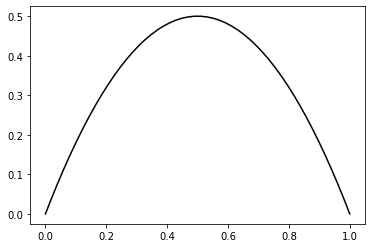

In [3]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x), 'k')

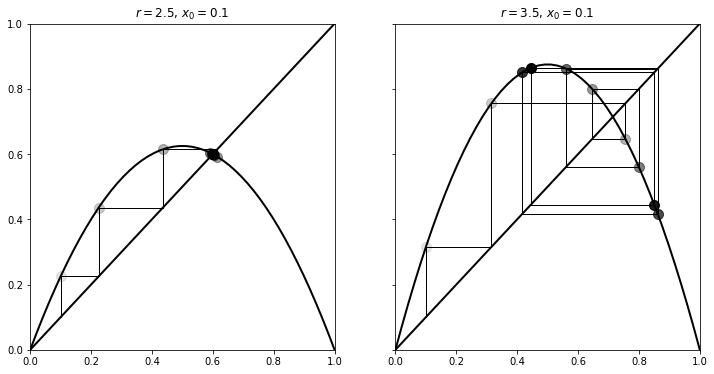

In [4]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.5, .1, 10, ax=ax2)

In [5]:
n = 10000
r = np.linspace(2.5, 4.0, n)

In [6]:
iterations = 2000
last = 100

In [7]:
x = 1e-5 * np.ones(n)

In [8]:
lyapunov = np.zeros(n)

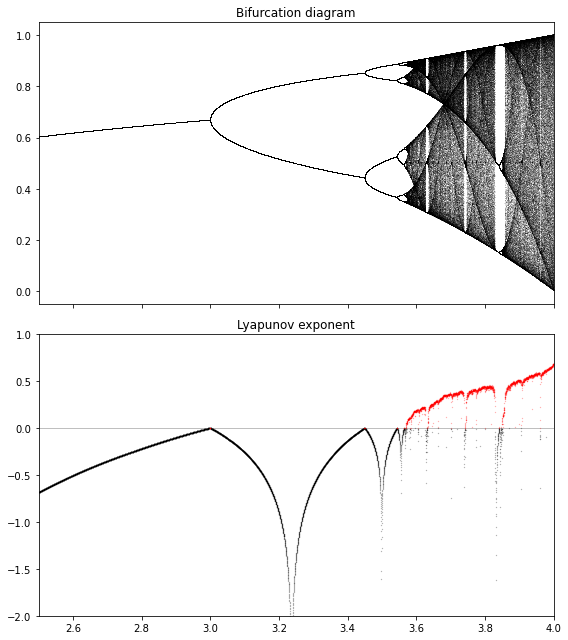

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.125)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

In [10]:
fig.savefig("foo.pdf", bbox_inches='tight')

In [11]:
pwd()

'/home/michael/work/meetings/Masterclass2021/notebooks'

Text(0, 0.5, 'system dynamics $x_t$')

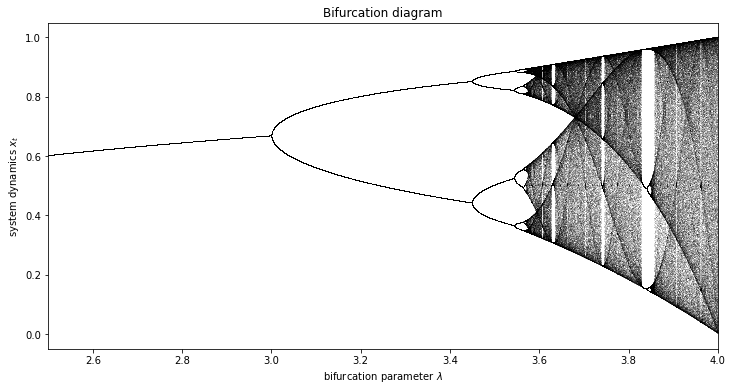

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax.plot(r, x, ',k', alpha=.125)
ax.set_xlim(2.5, 4)
ax.set_title("Bifurcation diagram")
ax.set_xlabel("bifurcation parameter $\lambda$")
ax.set_ylabel("system dynamics $x_t$")

In [13]:
fig.savefig("mc_logbif.png", bbox_inches="tight")


Text(0, 0.5, '$x_{t+1}$')

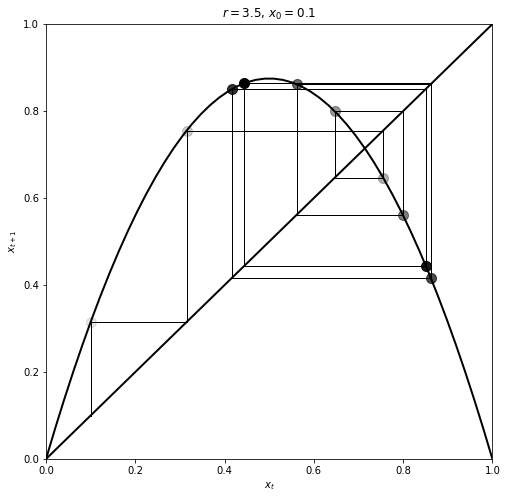

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plot_system(3.5, .1, 10, ax)
ax.set_xlabel("$x_t$")
ax.set_ylabel("$x_{t+1}$")

In [15]:
fig.savefig("mc_logpp.pdf", bbox_inches="tight")

In [16]:
z=0.6346
len=500
xt=np.empty(len,dtype=object) 
for i in range(len):
    z=logistic(4,z)
    xt[i]=z


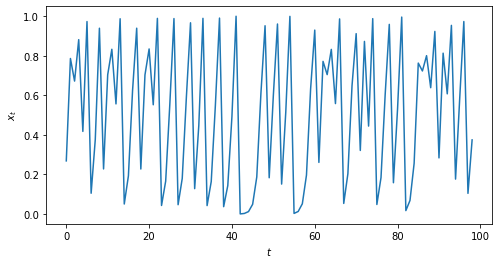

In [17]:
plt.figure(figsize=(8,4))
plt.plot(xt[1:100])
plt.xlabel("$t$")
plt.ylabel("$x_t$")
plt.savefig("mc_logts.pdf")

In [18]:


def lorenz(x, y, z, s=10, r=28, b=2.667):
    """
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    """
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 20000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


In [19]:
xs[0]=xs[num_steps]
ys[0]=ys[num_steps]
zs[0]=zs[num_steps]


# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


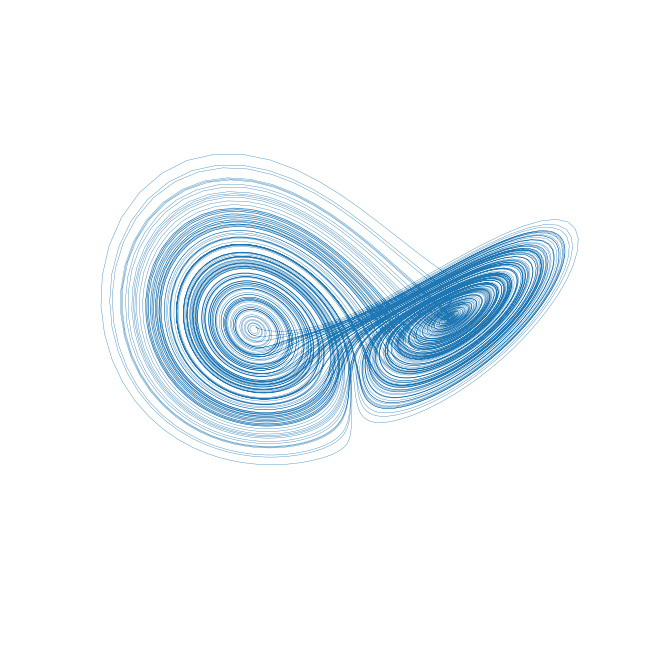

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# Plot
fig = plt.figure(figsize=(12,12))

ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.35)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
#ax.set_title("Lorenz Attractor")
plt.axis('off')

plt.savefig("mc_loratt.pdf", bbox_inches="tight")

(0.0, 5000.0)

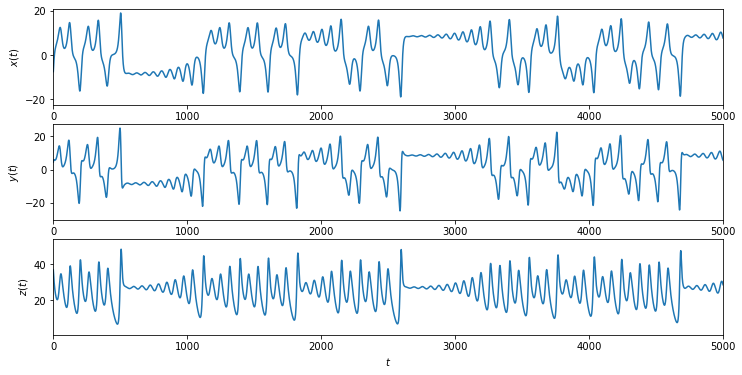

In [21]:

fig, axs = plt.subplots(3, 1, figsize=(12, 6), )
axs[0].plot(xs)
axs[1].plot(ys)
axs[2].plot(zs)
axs[0].set_xlabel("$t$")
axs[0].set_ylabel("$x(t)$")
axs[1].set_xlabel("$t$")
axs[1].set_ylabel("$y(t)$")
axs[2].set_xlabel("$t$")
axs[2].set_ylabel("$z(t)$")
axs[0].set_xlim(0, 5000)
axs[2].set_xlim(0, 5000)
axs[1].set_xlim(0, 5000)


In [22]:
fig.savefig("mc_lorts.pdf",  bbox_inches="tight")

In [23]:
import pandas as pd 

In [28]:
data = pd.read_csv("../data/df.csv") 

In [29]:
data

,Unnamed: 0,S1,S2,S3,A4,Trash1,Trash2,Trash3,Trash4,Trash5,...,Trash22,Trash23,Trash24,Trash25,Trash26,Trash27,Trash28,Trash29,Trash30,Tag
0,1,0.121063,0.857515,-0.007526,0,-0.146695,-2.217317,-4.982531,3.610859,4.472537,...,-22.162901,-24.788712,-22.933061,24.132704,-26.354761,-27.590321,-29.172470,-28.693896,-31.376408,0.0
1,2,0.453959,0.699005,-0.004848,0,2.380394,3.391858,-2.832464,5.282504,5.119999,...,-21.371287,-22.127974,-23.577265,26.300119,27.122467,-28.612041,28.300253,-30.061294,29.490013,0.0
2,3,-0.908008,1.419010,-0.002542,0,1.801538,-0.224091,-4.729420,3.624607,5.434171,...,-23.128300,24.965884,-24.715683,-24.183158,-23.476020,26.085776,-27.931447,29.824656,-29.231307,0.0
3,4,0.212006,1.110814,-0.017078,0,-2.244919,1.178036,3.889205,-2.929158,-4.948295,...,-19.540374,22.450796,-22.534872,-23.925505,24.895906,-26.913462,-27.487692,28.318624,-30.055930,0.0
4,5,0.252860,1.454235,-0.005456,0,0.840656,-1.332283,-3.925407,5.539540,4.640948,...,23.090419,-21.834273,23.773378,23.875536,25.373222,-25.164678,-28.218190,-28.981364,-30.299919,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99269,99270,0.345453,0.796743,-0.008562,0,-0.400890,2.931000,-2.912751,-4.617049,-5.058045,...,-22.203805,-21.932642,23.058548,24.608505,-24.668423,-27.257309,-28.222586,29.163429,29.884950,0.0
99270,99271,0.283058,1.072422,0.011129,0,0.226659,-2.257414,2.218899,-4.342518,-7.598495,...,20.555458,23.745507,-24.425584,23.859160,-25.782293,26.264506,28.729717,-30.843094,30.565787,0.0
99271,99272,0.356857,0.573540,-0.015731,0,-0.035888,-3.500362,-3.130609,-4.266800,4.133764,...,-21.561185,22.818135,24.667721,-26.690728,-26.525498,26.656144,-27.799932,27.289689,29.798311,0.0
99272,99273,0.149699,1.370278,-0.008276,0,2.138564,1.979637,-3.097834,3.616086,4.559832,...,-22.769314,25.533851,-24.334742,24.280509,26.773290,24.967324,27.202691,29.820841,-31.831026,0.0


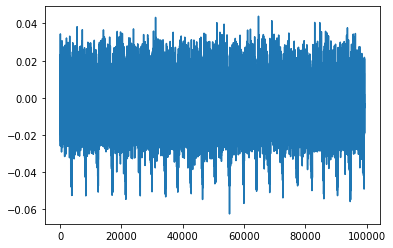

In [30]:
plt.plot(data["S3"])

In [31]:
data = pd.read_csv("../data/ecgvf.dat") 

(228.0, 342.0)

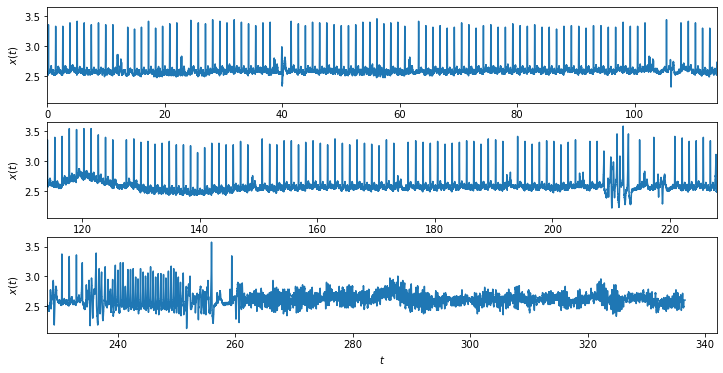

In [32]:
tm=np.linspace(0,data.size/250,data.size)

fig, axs = plt.subplots(3, 1, figsize=(12, 6), )
axs[0].plot(tm,data)
axs[1].plot(tm,data)
axs[2].plot(tm,data)
axs[0].set_xlabel("$t$")
axs[0].set_ylabel("$x(t)$")
axs[1].set_xlabel("$t$")
axs[1].set_ylabel("$x(t)$")
axs[2].set_xlabel("$t$")
axs[2].set_ylabel("$x(t)$")
axs[0].set_xlim(0, 114)
axs[1].set_xlim(114, 228)
axs[2].set_xlim(228, 342)

In [33]:
fig.savefig("mc_ecgvf.pdf",  bbox_inches="tight")

In [34]:
data = pd.read_csv("../data/respire.dat") 

(620.0, 930.0)

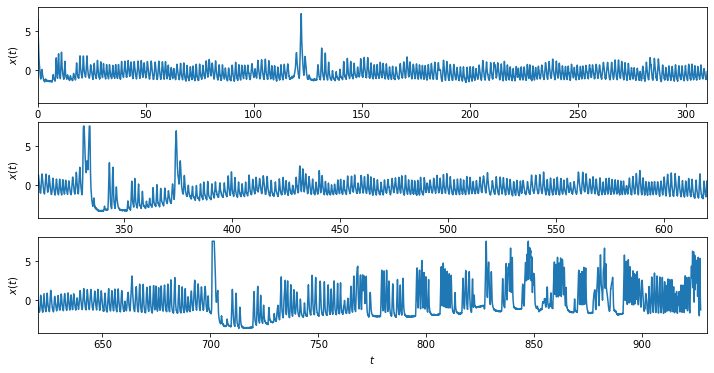

In [35]:
tm=np.linspace(0,data.size/50,data.size)

fig, axs = plt.subplots(3, 1, figsize=(12, 6), )
axs[0].plot(tm,data)
axs[1].plot(tm,data)
axs[2].plot(tm,data)
axs[0].set_xlabel("$t$")
axs[0].set_ylabel("$x(t)$")
axs[1].set_xlabel("$t$")
axs[1].set_ylabel("$x(t)$")
axs[2].set_xlabel("$t$")
axs[2].set_ylabel("$x(t)$")
axs[0].set_xlim(0, 310)
axs[1].set_xlim(310, 620)
axs[2].set_xlim(620, 930)

In [36]:
fig.savefig("mc_respire.pdf",  bbox_inches="tight")

In [42]:
bad1 = pd.read_csv("../data/Bearing_fault_1.csv") 
bad2 = pd.read_csv("../data/Bearing_fault_2.csv") 
bad3 = pd.read_csv("../data/Bearing_fault_3.csv") 
good = pd.read_csv("../data/Bearing_healthy.csv") 


(0.0, 1.0)

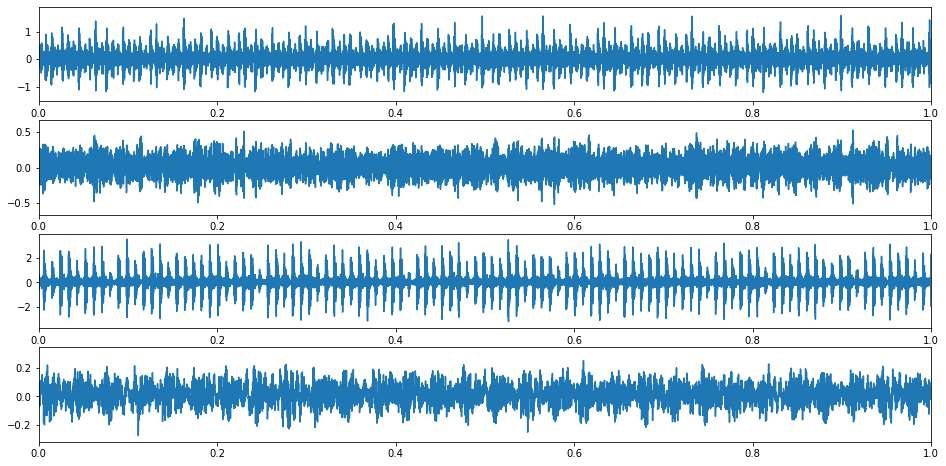

In [107]:
tm=np.linspace(0,bad1.size/12000,bad1.size)
fig, axs = plt.subplots(4, 1, figsize=(16, 8) )
tm=np.linspace(0,bad1.size/12000,bad1.size)
axs[0].plot(tm,bad1)
tm=np.linspace(0,bad2.size/12000,bad2.size)
axs[1].plot(tm,bad2)
tm=np.linspace(0,bad3.size/12000,bad3.size)
axs[2].plot(tm,bad3)
tm=np.linspace(0,good.size/12000,good.size)
axs[3].plot(tm,good)
axs[0].set_xlim(0, 1)
axs[1].set_xlim(0, 1)
axs[2].set_xlim(0, 1)
axs[3].set_xlim(0, 1)


In [108]:
fig.savefig("mc_bearings.pdf",  bbox_inches="tight")

In [103]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

def plot_ps(z, ax):
    
    #z=np.to_numpy(z_panda)
    z=np.concatenate(z)
    
    fs = 12e3
    tm=np.linspace(0,z.size/fs,z.size)
    N = z.size

    # signal.welch
    f, Pxx_spec = signal.welch(z, fs, 'flattop', 1024, scaling='spectrum')
    ax.semilogy(f, np.sqrt(Pxx_spec))



KeyError: 0

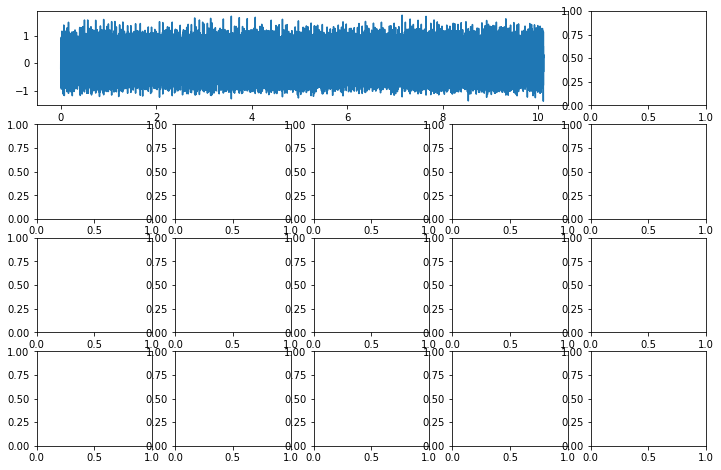

In [104]:
fig = plt.subplots(4,5, figsize=(12, 8) )
axs0 = plt.subplot2grid((4, 5), (0, 0), colspan=4)
axs1 = plt.subplot2grid((4, 5), (0, 4), colspan=1)
tm=np.linspace(0,bad1.size/12000,bad1.size)
axs0.plot(tm,bad1)
plot_ps(bad1,axs1)

axs2 = plt.subplot2grid((4, 5), (1, 0), colspan=4)
axs3 = plt.subplot2grid((4, 5), (1, 4), colspan=1)
tm=np.linspace(0,bad2.size/12000,bad2.size)
axs2.plot(tm,bad2)
plot_ps(bad2,axs3)

axs4 = plt.subplot2grid((4, 5), (2, 0), colspan=4)
axs5 = plt.subplot2grid((4, 5), (2, 4), colspan=1)
tm=np.linspace(0,bad3.size/12000,bad3.size)
axs4.plot(tm,bad3)
plot_ps(bad3,axs5)

axs6 = plt.subplot2grid((4, 5), (3, 0), colspan=4)
axs7 = plt.subplot2grid((4, 5), (3, 4), colspan=1)
tm=np.linspace(0,good.size/12000,good.size)
axs6.plot(tm,good)
plot_ps(good,axs7)

axs0.set_xlim(0, 1)
axs2.set_xlim(0, 1)
axs4.set_xlim(0, 1)
axs6.set_xlim(0, 1)


In [91]:
z=bad3

In [83]:
    fs = 12e3
    tm=np.linspace(0,z.size/fs,z.size)
    N = z.size

    # signal.welch
    f, Pxx_spec = signal.welch(z, fs, 'flattop', 1024, scaling='spectrum')

/home/michael/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1024 is greater than input length  = 1, using nperseg = 1
  warnings.warn('nperseg = {0:d} is greater than input length '


In [92]:
z2=z.to_numpy()


In [95]:
z2=np.concatenate(z2)

In [96]:
z2

array([ 0.42355 ,  0.012995, -0.26518 , ...,  0.17584 ,  0.11005 ,
       -0.10274 ])